In [3]:
#데이터 불러오기
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('diabetes.csv')

# 상위 5개 샘플 미리보기
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 컬럼 이름 확인
print("📌 컬럼 목록:")
print(df.columns)

# 각 컬럼별 데이터 타입 + 결측치 유무 확인
print("\n📌 요약 정보:")
print(df.info())

# 기본 통계 보기
print("\n📌 기본 통계:")
print(df.describe())

# 0이 몇 개 있는지 확인 (결측치처럼 간주할지 판단하기 위해)
print("\n📌 0값 개수 확인:")
print((df == 0).sum())

📌 컬럼 목록:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

📌 요약 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

📌 기본 통계:
       Pregnancies     Glucose  BloodPressure

In [5]:
print(df.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [6]:
print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [7]:
import numpy as np

# 1. 0을 결측치로 간주할 컬럼들 (의학적으로 0이 불가능)
cols_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2. 해당 컬럼들의 0값을 NaN으로 바꾸기
df[cols_with_invalid_zeros] = df[cols_with_invalid_zeros].replace(0, np.nan)

# 3. NaN을 평균값으로 대체하기
df.fillna(df.mean(numeric_only=True), inplace=True)

# 4. 확인: 결측치가 잘 처리되었는지 확인
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

# 1. 특성과 타겟 분리
X = df.drop('Outcome', axis=1)  # 입력 데이터
y = df['Outcome']               # 타겟값 (분류 목적)

# 2. 정규화 (평균 0, 표준편차 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. 결과 확인
print(pd.DataFrame(X_scaled).describe())

                  0             1             2             3             4  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean  -6.476301e-17 -3.561966e-16  6.915764e-16  7.956598e-16 -3.330669e-16   
std    1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00  1.000652e+00   
min   -1.141852e+00 -2.554131e+00 -4.004245e+00 -2.521670e+00 -1.665945e+00   
25%   -8.448851e-01 -7.212214e-01 -6.953060e-01 -4.727737e-01 -4.007289e-01   
50%   -2.509521e-01 -1.540881e-01 -1.675912e-02  8.087936e-16 -3.345079e-16   
75%    6.399473e-01  6.103090e-01  6.282695e-01  3.240194e-01 -3.345079e-16   
max    3.906578e+00  2.541850e+00  4.102655e+00  7.950467e+00  8.126238e+00   

                  5             6             7  
count  7.680000e+02  7.680000e+02  7.680000e+02  
mean   3.515706e-16  2.451743e-16  1.931325e-16  
std    1.000652e+00  1.000652e+00  1.000652e+00  
min   -2.075119e+00 -1.189553e+00 -1.041549e+00  
25%   -7.215397e-01 -6.889685e-01 -7.8

In [9]:
from sklearn.model_selection import train_test_split

# X: 입력 데이터 (정규화 완료된)
# y: 타겟값 (Outcome - 0 or 1)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,           # 입력값
    y,                  # 정답값
    test_size=0.2,      # 테스트 데이터 비율 (20%)
    random_state=42     # 랜덤 시드 (재현 가능성 확보)
)

# 분할 결과 확인
print("학습 데이터 크기:", X_train.shape)
print("테스트 데이터 크기:", X_test.shape)

학습 데이터 크기: (614, 8)
테스트 데이터 크기: (154, 8)


In [10]:
import torch
import torch.nn as nn

class DiabetesClassifier(nn.Module):
    def __init__(self):
        super(DiabetesClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(8, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()  # 확률 출력
        )

    def forward(self, x):
        return self.model(x)

In [11]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

# 1. 넘파이 → 텐서 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 2. 데이터로더 구성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# 3. 모델 생성
model = DiabetesClassifier()
criterion = nn.BCELoss()  # 이진 분류용 손실 함수
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 4. 학습 루프
epochs = 50
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/50, Loss: 0.6658
Epoch 2/50, Loss: 0.6348
Epoch 3/50, Loss: 0.5935
Epoch 4/50, Loss: 0.5613
Epoch 5/50, Loss: 0.5292
Epoch 6/50, Loss: 0.4960
Epoch 7/50, Loss: 0.4747
Epoch 8/50, Loss: 0.4735
Epoch 9/50, Loss: 0.4632
Epoch 10/50, Loss: 0.4405
Epoch 11/50, Loss: 0.4510
Epoch 12/50, Loss: 0.4834
Epoch 13/50, Loss: 0.4348
Epoch 14/50, Loss: 0.4485
Epoch 15/50, Loss: 0.4370
Epoch 16/50, Loss: 0.4455
Epoch 17/50, Loss: 0.4199
Epoch 18/50, Loss: 0.4402
Epoch 19/50, Loss: 0.4152
Epoch 20/50, Loss: 0.4182
Epoch 21/50, Loss: 0.4223
Epoch 22/50, Loss: 0.4186
Epoch 23/50, Loss: 0.4117
Epoch 24/50, Loss: 0.4060
Epoch 25/50, Loss: 0.4170
Epoch 26/50, Loss: 0.4084
Epoch 27/50, Loss: 0.4065
Epoch 28/50, Loss: 0.4066
Epoch 29/50, Loss: 0.4056
Epoch 30/50, Loss: 0.4148
Epoch 31/50, Loss: 0.3994
Epoch 32/50, Loss: 0.4042
Epoch 33/50, Loss: 0.4031
Epoch 34/50, Loss: 0.3954
Epoch 35/50, Loss: 0.4199
Epoch 36/50, Loss: 0.3972
Epoch 37/50, Loss: 0.4127
Epoch 38/50, Loss: 0.3889
Epoch 39/50, Loss: 0.

In [12]:
from sklearn.metrics import accuracy_score

# 1. 평가 모드 설정
model.eval()

# 2. 예측 및 정답 저장 리스트
all_preds = []
all_labels = []

# 3. 테스트셋에서 예측 수행
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = (outputs > 0.5).float()  # 시그모이드 결과가 0.5 이상이면 1로 분류
        all_preds.extend(predicted.numpy())
        all_labels.extend(y_batch.numpy())

# 4. 정확도 계산
acc = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {acc * 100:.2f}%")

✅ Test Accuracy: 75.32%


In [13]:
#데이터 불러오기
import pandas as pd

# CSV 파일 불러오기
df = pd.read_csv('heart (1).csv')

# 상위 5개 샘플 미리보기
df.head()
	# 1.	df.head(), df.info() → 데이터 구조 확인
	# 2.	df.describe() → 이상치, 값의 범위 확인
	# 3.	df.isnull().sum() 또는 (df == 0).sum() → 결측치 탐색
	# 4.	있을 때만 → fillna() 또는 평균/중앙값으로 대체
	# 5.	필요할 때만 → StandardScaler 또는 MinMaxScaler 사용

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [16]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [17]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# 머신러닝 모델

#이진분류 - 로지스틱 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

# 회귀 - 선형회귀 (Linear Regression)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))



In [ ]:
# 딥러닝 Pytorch
# 📌 3. 이진 분류 – MLPClassifier (PyTorch)

import torch
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1).values
y = df['target'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

class MLPClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

model = MLPClassifier()
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    output = model(X_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# 📌 4. 회귀 – MLPRegressor (PyTorch)

class MLPRegressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(X_train.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

model = MLPRegressor()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(100):
    model.train()
    output = model(X_train)
    loss = criterion(output, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
# ✅ 인공지능 모델 학습 전체 단계별 실전 치트시트

# ==============================================
# 📌 [1단계] 데이터 로드 및 확인
# ==============================================
import pandas as pd
import numpy as np

df = pd.read_csv('파일이름.csv')   # CSV 파일 로드

print(df.head())                  # 앞 5개 행 출력
print(df.columns)                 # 컬럼 목록 확인
print(df.info())                  # 컬럼별 데이터 타입 + 결측치 확인
print(df.describe())              # 수치형 데이터 통계 요약

# ✅ 주의: describe()에서 min값이 0인데 그럴 수 없는 데이터는 결측치 의심


# ==============================================
# 📌 [2단계] 결측치 및 이상치 처리
# ==============================================
print(df.isnull().sum())         # 결측치 개수 확인
print((df == 0).sum())           # 0값이 결측치로 간주될 수 있는 경우

# ✅ 결측치 제거
# df.dropna(inplace=True)

# ✅ 특정 컬럼의 0값을 평균으로 대체 (예: 혈압, BMI 등)
df['컬럼명'] = df['컬럼명'].replace(0, np.nan)
df['컬럼명'] = df['컬럼명'].fillna(df['컬럼명'].mean())

# ✅ 주의: 의미 있는 0은 대체하지 말 것 (ex: 성별, 질병 여부 등)


# ==============================================
# 📌 [3단계] 인코딩 (범주형 처리)
# ==============================================
from sklearn.preprocessing import LabelEncoder

# ✅ Label Encoding
le = LabelEncoder()
df['컬럼명'] = le.fit_transform(df['컬럼명'])

# ✅ One-hot Encoding
# df = pd.get_dummies(df, columns=['컬럼명'])

# ✅ 주의: 숫자처럼 보여도 의미가 없는 범주형일 수 있음 → 정규화 ❌


# ==============================================
# 📌 [4단계] 정규화 (Standardization)
# ==============================================
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['정규화할_컬럼1', '정규화할_컬럼2']
df[num_cols] = scaler.fit_transform(df[num_cols])

# ✅ 주의: 0~1 범위나 이진값은 정규화 필요 없음


# ==============================================
# 📌 [5단계] 데이터 분할
# ==============================================
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# ✅ 주의: 항상 전처리 후 분할할 것


# ==============================================
# 📌 [6단계] 모델 설계 (PyTorch 예시)
# ==============================================
import torch
import torch.nn as nn

# ✅ 분류 예시 (시그모이드 사용)
class MLPClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()  # 분류일 때 사용
        )
    def forward(self, x):
        return self.net(x)

# ✅ 회귀 예시 (시그모이드 X)
class MLPRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)   # 시그모이드 없음
        )
    def forward(self, x):
        return self.net(x)


# ==============================================
# 📌 [7단계] 모델 학습
# ==============================================
torch.manual_seed(42)

model = MLPClassifier(X_train.shape[1])
criterion = nn.BCELoss()     # 분류 → BCELoss, 회귀 → MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

for epoch in range(100):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


# ==============================================
# 📌 [8단계] 평가
# ==============================================
from sklearn.metrics import accuracy_score, mean_squared_error

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    
    if isinstance(criterion, nn.BCELoss):  # 분류일 때
        preds = (y_pred_test > 0.5).float()
        acc = accuracy_score(y_test_tensor, preds)
        print("Test Accuracy:", acc)
    else:  # 회귀일 때
        mse = mean_squared_error(y_test_tensor, y_pred_test)
        print("Test MSE:", mse)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart (1).csv')   # CSV 파일 로드

In [2]:
print(df.head())                  # 앞 5개 행 출력
# print(df.columns)                 # 컬럼 목록 확인
# print(df.info())                  # 컬럼별 데이터 타입 + 결측치 확인
# print(df.describe())  

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.62376

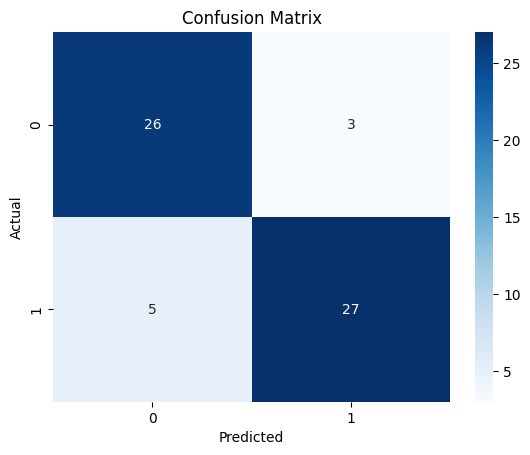

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("heart (1).csv")

# 💡 2. 데이터 확인 및 전처리
print(df.info())
print(df.describe())
print((df == 0).sum())  # 0이 결측일 가능성 있는 컬럼 찾기

# 필요 시 이상한 0값을 평균으로 대체 (예시: chol, thalach 등)
# df['chol'] = df['chol'].replace(0, np.nan).fillna(df['chol'].mean())

# 범주형 인코딩 필요 여부 확인 (예: 'sex', 'cp', 'thal')
categorical_cols = ['cp', 'thal', 'slope']
df = pd.get_dummies(df, columns=categorical_cols)

# 💡 3. X, y 분리 및 정규화
X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 💡 4. 학습/검증용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# 💡 5. PyTorch 텐서 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# 💡 6. 모델 구성 (이진 분류용 MLP)
class HeartClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()  # 이진 분류 → 확률 출력
        )

    def forward(self, x):
        return self.net(x)

# 💡 7. 모델, 손실함수, 옵티마이저 설정
model = HeartClassifier(X_train.shape[1])
criterion = nn.BCELoss()  # 이진 분류 손실함수
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 💡 8. 모델 학습
for epoch in range(100):
    model.train()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 💡 9. 평가
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test > 0.5).float()

# 정확도 출력
acc = accuracy_score(y_test_tensor, y_pred_labels)
print("✅ Test Accuracy:", acc)

# 분류 리포트
print("\n📋 Classification Report:")
print(classification_report(y_test_tensor, y_pred_labels))

# Confusion matrix 시각화
cm = confusion_matrix(y_test_tensor, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# 하이퍼 파라미터 튜닝 방법
# 1. GridSearchCV (가장 기본)

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)



In [ ]:
# 2. RandomizedSearchCV (빠르게 테스트할 때)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(2, 10),
}

search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=params, cv=5, n_iter=10)
search.fit(X_train, y_train)

In [ ]:
# 딥러닝

# 바꾸기 전
model = nn.Sequential(
    nn.Linear(13, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1),
    nn.Sigmoid()
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # 학습률 바꿔보기